<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

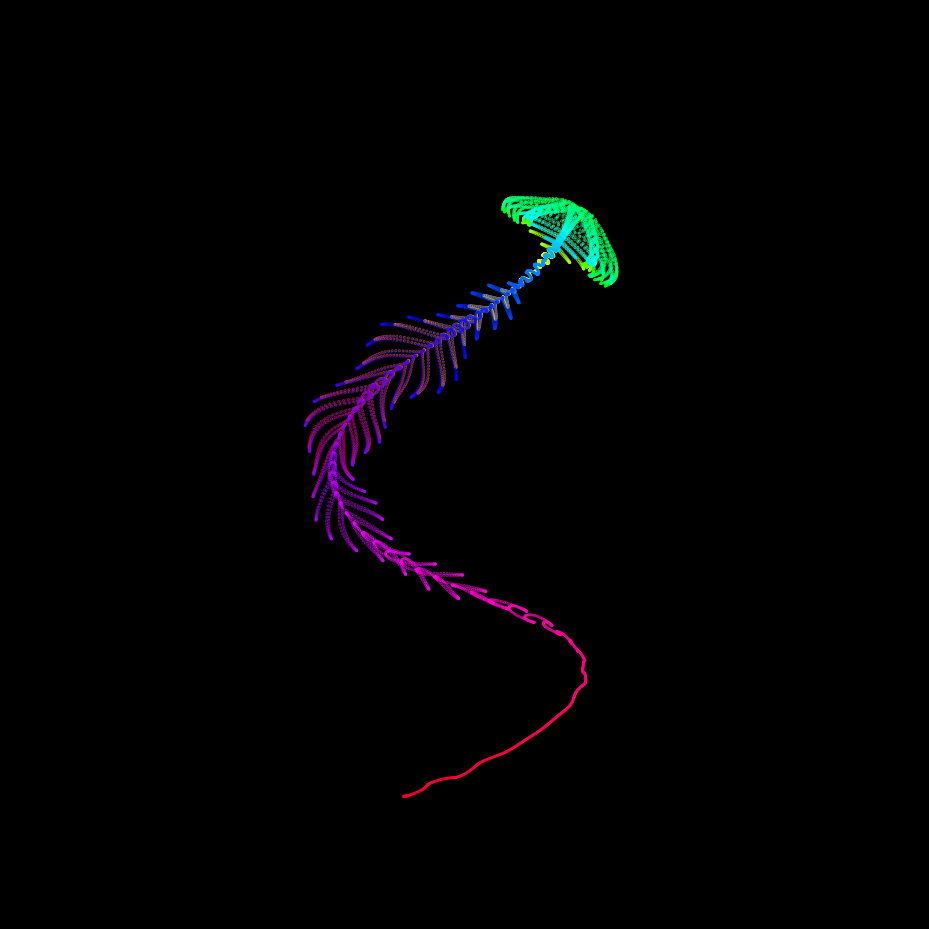

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import to_rgb
from matplotlib.cm import hsv

# Set up figure
fig, ax = plt.subplots(figsize=(6, 6), dpi=150)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax.set_xlim(0, 400)
ax.set_ylim(400, 0)
ax.set_aspect('equal')
ax.axis('off')
bg_color = to_rgb('#000000')
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Parameters
num_frames = 150
num_points = 10000
t_values = np.linspace(0, 2*np.pi, num_frames)
x = np.arange(num_points)
y = x / 41.0
xp_all = np.zeros((num_frames, num_points))
yp_all = np.zeros((num_frames, num_points))
color_all = np.zeros((num_frames, num_points, 3))

# Compute animation data
for frame_idx, t in enumerate(t_values):
    k = 5 * np.cos(x/19) * np.cos(y/30)
    e = y/8 - 12
    d0 = np.sqrt(k**2 + e**2)
    d = (d0**2)/59 + 2
    angle = np.arctan2(k, e)
    q = (4 * np.sin(angle * 9) + 9 * np.sin(d - t) -
         (k/d) * (9 + 3*np.sin(d*9 - t*16)))
    c = (d**2)/7 - t
    xp = q + 50*np.cos(c) + 200
    yp = q*np.sin(c) + d*45 - 9
    xp_all[frame_idx] = xp
    yp_all[frame_idx] = yp
    hues = (x / num_points + frame_idx / num_frames) % 1.0
    color_all[frame_idx] = hsv(hues)[:, :3]

# Create animation
scatter = ax.scatter(xp_all[0], yp_all[0], s=0.1, c=color_all[0], alpha=0.7, rasterized=True)

def update(frame):
    scatter.set_offsets(np.column_stack((xp_all[frame], yp_all[frame])))
    scatter.set_facecolor(color_all[frame])
    return [scatter]

ani = FuncAnimation(fig, update, frames=num_frames, blit=True, interval=33)

# Save colorful GIF
gif_path = "jellyfish.gif"
ani.save(gif_path, writer=PillowWriter(fps=30), dpi=150, savefig_kwargs={'facecolor': bg_color})

from google.colab import files
files.download("jellyfish.gif")
